# DiploDatos 2020 - Coronavirus en Argentina

## Práctico Análisis Exploratorio y Curación de Datos

Database: https://github.com/lucia15/Datos-Covid19-Argentina

### Tareas a realizar:

* Detectar al menos **tres** variables con valores faltantes no triviales. Decidir qué tratamiento darles (eliminarlos, computarlos, etc.), investigar los métodos disponibles en pandas para dichos fines.

* Detectar al menos **cinco** inconsistencias en los datos, discutir a qué se deben y qué podemos hacer con ellas.
 
* Elegir al menos **una** variable que tenga outliers, debatir y decidir qué hacer con los mismos.

### Empezamos

In [1]:
### Aumentar el ancho del notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
# Importamos las librerías necesarias
import os
import datetime
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 100)

In [3]:
## Seteamos semilla random para reproducibilidad
np.random.seed(0)

### Inicialización y carga de datos

In [4]:
url = 'https://raw.githubusercontent.com/lucia15/Datos-Covid19-Argentina/master'

In [5]:
file1 = os.path.join(url, 'Argentina-covid19.csv')

data1 = pd.read_csv(file1, error_bad_lines=False)

In [6]:
file2 = os.path.join(url, 'Argentina-covid19-por-provincia.csv')

data2 = pd.read_csv(file2, error_bad_lines=False)

In [7]:
file3 = os.path.join(url, 'Argentina-covid19-fallecidos.csv')

data3 = pd.read_csv(file3, error_bad_lines=False)

Antes de comenzar, es necesario repasar cuáles son las variables que tenemos:

In [8]:
# Obtenemos la cantidad de filas y columnas
print("Cantidad de registros: ", data1.shape[0])
print("Cantidad de columnas: ", data1.shape[1])

Cantidad de registros:  132
Cantidad de columnas:  32


In [9]:
# Listamos las columnas y sus tipos de datos
data1.dtypes

fecha                       object
dia_cuarentena             float64
casos_nuevos                 int64
casos_total                  int64
%mujer                      object
%varon                      object
mujer_total                float64
varon_total                float64
franja_etaria               object
edad_prom                  float64
importados_total             int64
importados_nuevos            int64
local_total                  int64
local_nuevos                 int64
comunitario_total            int64
comunitario_nuevos         float64
en_investigacion_total       int64
en_investigacion_nuevos      int64
muertes_total                int64
muertes_nuevos               int64
alta_total                 float64
alta_nuevos                float64
alta_definitiva            float64
descartados_total          float64
descartados_nuevos         float64
tests_realizados_total     float64
tests_realizados_nuevos    float64
test_por_millon_hab         object
UTI_internados      

Revisar en https://github.com/lucia15/Datos-Covid19-Argentina de qué se trataba cada una

In [10]:
# Cambiamos el tipo de la columna 'fecha' de object a datetime
data1['fecha'] = pd.to_datetime(data1['fecha'], format='%Y-%m-%d')

In [11]:
#data1.head()
#data1.tail()
data1

,fecha,dia_cuarentena,casos_nuevos,casos_total,%mujer,%varon,mujer_total,varon_total,franja_etaria,edad_prom,importados_total,importados_nuevos,local_total,local_nuevos,comunitario_total,...,en_investigacion_nuevos,muertes_total,muertes_nuevos,alta_total,alta_nuevos,alta_definitiva,descartados_total,descartados_nuevos,tests_realizados_total,tests_realizados_nuevos,test_por_millon_hab,UTI_internados,UTI_%Nacion,UTI_%AMBA,observaciones
0,2020-03-05,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0,...,0,0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-06,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,2,1,0,0,0,...,0,0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-07,NaN,7,9,NaN,NaN,NaN,NaN,NaN,NaN,9,7,0,0,0,...,0,0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-08,NaN,3,12,NaN,NaN,NaN,NaN,NaN,NaN,12,3,0,0,0,...,0,0,0,0.0,0.0,0.0,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN
4,2020-03-09,NaN,5,17,NaN,NaN,NaN,NaN,NaN,NaN,17,5,0,0,0,...,0,1,1,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,2020-07-10,112.0,3367,94060,"49,4","50,6",46466.0,47594.0,NaN,NaN,1078,2,31739,1142,45328,...,269,1774,54,41408.0,NaN,NaN,283872.0,NaN,456042.0,10309.0,"10050,1",686.0,"51,7","58,3",NaN
128,2020-07-11,113.0,3449,97509,"49,4","50,6",48169.0,49340.0,NaN,NaN,1080,2,32616,877,46824,...,1074,1810,36,42694.0,NaN,NaN,289032.0,NaN,466308.0,10266.0,"10276,4",NaN,NaN,NaN,Reporte vespertino 20-07-11 no fue publicado e...
129,2020-07-12,114.0,2657,100166,"49,4","50,6",49482.0,50684.0,NaN,NaN,1081,1,33376,760,48213,...,507,1845,35,44173.0,NaN,NaN,293297.0,NaN,474422.0,8114.0,"10455,2",735.0,52,"59,5",NaN
130,2020-07-13,115.0,3099,103265,"49,4","50,6",51013.0,52252.0,NaN,NaN,1082,1,34293,917,50637,...,-243,1903,58,45467.0,NaN,NaN,298086.0,NaN,483799.0,9377.0,10661,752.0,"52,7","60,8",NaN


In [12]:
# TODO: Hacer lo mismo con los otros datasets

In [13]:
print("Cantidad de registros: ", data2.shape[0])
print("Cantidad de columnas: ", data2.shape[1])

Cantidad de registros:  2661
Cantidad de columnas:  7


In [14]:
data2.dtypes

fecha              object
provincia          object
casos_total         int64
casos_nuevos        int64
muertes_total     float64
muertes_nuevos    float64
observaciones      object
dtype: object

In [15]:
data2['fecha'] = pd.to_datetime(data2['fecha'], format='%Y-%m-%d')

In [16]:
data2.head()

,fecha,provincia,casos_total,casos_nuevos,muertes_total,muertes_nuevos,observaciones
0,2020-03-05,CABA,1,1,0.0,0.0,El caso es importado
1,2020-03-06,CABA,2,1,0.0,0.0,El nuevo caso es importado
2,2020-03-07,Buenos Aires,1,1,0.0,0.0,NaN
3,2020-03-07,CABA,8,6,0.0,0.0,NaN
4,2020-03-08,Buenos Aires,2,1,0.0,0.0,El nuevo caso es importado


In [17]:
print("Cantidad de registros: ", data3.shape[0])
print("Cantidad de columnas: ", data3.shape[1])

Cantidad de registros:  1987
Cantidad de columnas:  9


In [18]:
data3.dtypes

fecha              object
provincia          object
num_caso            int64
genero             object
edad              float64
tipo_caso          object
comorbilidades     object
viajes             object
observaciones      object
dtype: object

In [19]:
data3['fecha'] = pd.to_datetime(data3['fecha'], format='%Y-%m-%d')

In [20]:
data3.head()

,fecha,provincia,num_caso,genero,edad,tipo_caso,comorbilidades,viajes,observaciones
0,2020-03-09,CABA,1,hombre,64.0,importado,NaN,Francia,NaN
1,2020-03-13,Chaco,2,hombre,61.0,importado,NaN,Europa,"Trabajador de la salud, diagnosticado el 2020-..."
2,2020-03-19,CABA,3,hombre,64.0,local,NaN,Contacto estrecho,NaN
3,2020-03-21,Buenos Aires,4,mujer,67.0,importado,"Obesidad, enfermedad pulmonar obstructiva crón...",República Dominicana,Crucero Caribe del 29/2 al 12/3
4,2020-03-24,NaN,5,hombre,71.0,importado,"Diabetes, obesidad",España,NaN


### Algunas ideas para arrancar con el análisis

Como en el práctico anterior, estas son solo ayudas y sugerencias.

## Valores faltantes

El siguiente comando imprime True en los campos con valor NaN (not a number) y False donde sí hay asignado un valor.

In [21]:
data1.isnull()

,fecha,dia_cuarentena,casos_nuevos,casos_total,%mujer,%varon,mujer_total,varon_total,franja_etaria,edad_prom,importados_total,importados_nuevos,local_total,local_nuevos,comunitario_total,...,en_investigacion_nuevos,muertes_total,muertes_nuevos,alta_total,alta_nuevos,alta_definitiva,descartados_total,descartados_nuevos,tests_realizados_total,tests_realizados_nuevos,test_por_millon_hab,UTI_internados,UTI_%Nacion,UTI_%AMBA,observaciones
0,False,True,False,False,True,True,True,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True
1,False,True,False,False,True,True,True,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True
2,False,True,False,False,True,True,True,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True
3,False,True,False,False,True,True,True,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,False,True,True,True,True,True
4,False,True,False,False,True,True,True,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,True,True,False,True,False,False,False,False,False,False,True
128,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,True,True,False,True,False,False,False,True,True,True,False
129,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,True,True,False,True,False,False,False,False,False,False,True
130,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,True,True,False,True,False,False,False,False,False,False,True


Podemos observar por ejemplo que no falta ninguna fecha desde el 2020-03-05 hasta la actualidad:

In [22]:
df = data1['fecha'].isnull()
df[df==True]

Series([], Name: fecha, dtype: bool)

Sin embargo vemos que en este dataset faltan un montón de otros valores, principalmente entre los primeros días, esto se debe a que los primeros informes diarios tenían menos información. A medida que fueron pasando los días se incorporaron variables que tuvieron valores desde ese momento en adelante. 

Por ejemplo, la variable 'dia_cuarentena' tiene valores a partir del día 16

In [23]:
df = data1['dia_cuarentena'].isnull()
df[df==True]

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
Name: dia_cuarentena, dtype: bool

In [24]:
df[df==False]

16     False
17     False
18     False
19     False
20     False
       ...  
127    False
128    False
129    False
130    False
131    False
Name: dia_cuarentena, Length: 116, dtype: bool

Este es el día en que se declara la cuarentena por DNU 260

In [25]:
data1['fecha'][16]

Timestamp('2020-03-21 00:00:00')

valores en días anteriores no tendrían sentido.

Nos interesa detectar valores faltantes a partir del momento en que la variable tiene su primer valor, no antes.

Por ejemplo, para la variable '%mujer'

In [26]:
df = data1['%mujer'].isnull()
df[df==True]

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
106    True
Name: %mujer, dtype: bool

vemos que hasta el día 20 esta variable no tiene valores, posiblemente porque estos se empezaron a reportar a partir del día 21, ¿pero qué pasó en el día 106?

In [27]:
data1[105:108]

,fecha,dia_cuarentena,casos_nuevos,casos_total,%mujer,%varon,mujer_total,varon_total,franja_etaria,edad_prom,importados_total,importados_nuevos,local_total,local_nuevos,comunitario_total,...,en_investigacion_nuevos,muertes_total,muertes_nuevos,alta_total,alta_nuevos,alta_definitiva,descartados_total,descartados_nuevos,tests_realizados_total,tests_realizados_nuevos,test_por_millon_hab,UTI_internados,UTI_%Nacion,UTI_%AMBA,observaciones
105,2020-06-18,90.0,1958,37510,"49,4","50,6",18530.0,18980.0,20-59,36.0,1049,13,14420,615,15347,...,416,948,35,11851.0,1130.0,NaN,181353.0,4917.0,264604.0,7512.0,"5831,3",NaN,NaN,NaN,NaN
106,2020-06-19,91.0,2060,39570,NaN,NaN,NaN,NaN,NaN,NaN,1044,-5,15003,583,16383,...,446,979,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reporte matutino 20-06-20 no fue publicado en ...
107,2020-06-20,92.0,1634,41204,"49,4","50,6",20355.0,20849.0,20-59,36.0,1046,2,15528,525,17095,...,395,992,13,12728.0,NaN,NaN,189801.0,NaN,279672.0,6443.0,"6163,3",NaN,NaN,NaN,NaN


En el campo 'observaciones' vemos que el Reporte Matutino correspondiente a ese día no fue publicado en la página https://www.argentina.gob.ar/coronavirus/informe-diario/junio2020, y este es el Reporte que debía contener dicha información faltante.

#### TO DO:

* ¿Podemos completar este campo con algún valor? Hint: chequear las funciones *fillna()*, *replace()*, *interpolate()*

* ¿Qué otras variables están en una situación similar? ¿Podemos completarlas también?

* Buscar datos faltantes en los otros dos datasets y evaluar si es posible o no completarlos

Para más detalles leer los siguients artículos (si tienen tiempo):

* https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/

* https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b

* https://towardsdatascience.com/the-ultimate-guide-to-data-cleaning-3969843991d4

In [28]:
data1.columns

Index(['fecha', 'dia_cuarentena', 'casos_nuevos', 'casos_total', '%mujer',
       '%varon', 'mujer_total', 'varon_total', 'franja_etaria', 'edad_prom',
       'importados_total', 'importados_nuevos', 'local_total', 'local_nuevos',
       'comunitario_total', 'comunitario_nuevos', 'en_investigacion_total',
       'en_investigacion_nuevos', 'muertes_total', 'muertes_nuevos',
       'alta_total', 'alta_nuevos', 'alta_definitiva', 'descartados_total',
       'descartados_nuevos', 'tests_realizados_total',
       'tests_realizados_nuevos', 'test_por_millon_hab', 'UTI_internados',
       'UTI_%Nacion', 'UTI_%AMBA', 'observaciones'],
      dtype='object')

In [29]:
df = data1['casos_nuevos'].isnull()
df[df==True]

Series([], Name: casos_nuevos, dtype: bool)

In [30]:
df = data1['casos_total'].isnull()
df[df==True]

Series([], Name: casos_total, dtype: bool)

In [31]:
df = data1['%varon'].isnull()
df[df==True]

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
106    True
Name: %varon, dtype: bool

In [32]:
df = data1['mujer_total'].isnull()
df[df==True]

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
106    True
Name: mujer_total, dtype: bool

In [33]:
df = data1['varon_total'].isnull()
df[df==True]

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
106    True
Name: varon_total, dtype: bool

In [34]:
df = data1['franja_etaria'].isnull()
df[df==True]

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
106    True
126    True
127    True
128    True
129    True
130    True
131    True
Name: franja_etaria, dtype: bool

In [35]:
data1[124:]

,fecha,dia_cuarentena,casos_nuevos,casos_total,%mujer,%varon,mujer_total,varon_total,franja_etaria,edad_prom,importados_total,importados_nuevos,local_total,local_nuevos,comunitario_total,...,en_investigacion_nuevos,muertes_total,muertes_nuevos,alta_total,alta_nuevos,alta_definitiva,descartados_total,descartados_nuevos,tests_realizados_total,tests_realizados_nuevos,test_por_millon_hab,UTI_internados,UTI_%Nacion,UTI_%AMBA,observaciones
124,2020-07-07,109.0,2979,83426,"49,4","50,6",41212.0,42214.0,20-59,36.0,1074,1,28792,801,39718,...,465,1643,61,36502.0,NaN,NaN,267741.0,NaN,423782.0,9805.0,"9339,2",NaN,NaN,NaN,Reporte vespertino 20-07-07 no fue publicado e...
125,2020-07-08,110.0,3604,87030,"49,4","50,6",42993.0,44037.0,20-59,36.0,1074,0,29747,955,41495,...,872,1694,51,38313.0,NaN,NaN,273168.0,NaN,434692.0,10910.0,"9579,6",671.0,"52,4","59,7",NaN
126,2020-07-09,111.0,3663,90693,"49,4","50,6",44802.0,45891.0,NaN,NaN,1076,2,30597,850,43374,...,932,1720,26,38984.0,NaN,NaN,278647.0,NaN,445733.0,11041.0,"9822,9",662.0,"52,4","58,3",NaN
127,2020-07-10,112.0,3367,94060,"49,4","50,6",46466.0,47594.0,NaN,NaN,1078,2,31739,1142,45328,...,269,1774,54,41408.0,NaN,NaN,283872.0,NaN,456042.0,10309.0,"10050,1",686.0,"51,7","58,3",NaN
128,2020-07-11,113.0,3449,97509,"49,4","50,6",48169.0,49340.0,NaN,NaN,1080,2,32616,877,46824,...,1074,1810,36,42694.0,NaN,NaN,289032.0,NaN,466308.0,10266.0,"10276,4",NaN,NaN,NaN,Reporte vespertino 20-07-11 no fue publicado e...
129,2020-07-12,114.0,2657,100166,"49,4","50,6",49482.0,50684.0,NaN,NaN,1081,1,33376,760,48213,...,507,1845,35,44173.0,NaN,NaN,293297.0,NaN,474422.0,8114.0,"10455,2",735.0,52,"59,5",NaN
130,2020-07-13,115.0,3099,103265,"49,4","50,6",51013.0,52252.0,NaN,NaN,1082,1,34293,917,50637,...,-243,1903,58,45467.0,NaN,NaN,298086.0,NaN,483799.0,9377.0,10661,752.0,"52,7","60,8",NaN
131,2020-07-14,116.0,3645,106910,"49,3","50,7",52814.0,54096.0,NaN,NaN,1083,1,35260,967,53247,...,67,1987,84,47298.0,NaN,NaN,303987.0,NaN,495065.0,11266.0,10910,NaN,NaN,NaN,Reporte vespertino 20-07-14 no fue publicado e...


In [37]:
df = data1['edad_prom'].isnull()
df[df==True]

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
106    True
126    True
127    True
128    True
129    True
130    True
131    True
Name: edad_prom, dtype: bool

In [38]:
df = data1['importados_total'].isnull()
df[df==True]

Series([], Name: importados_total, dtype: bool)

In [39]:
df = data1['importados_nuevos'].isnull()
df[df==True]

Series([], Name: importados_nuevos, dtype: bool)

In [40]:
df = data1['local_total'].isnull()
df[df==True]

Series([], Name: local_total, dtype: bool)

In [41]:
df = data1['local_nuevos'].isnull()
df[df==True]

Series([], Name: local_nuevos, dtype: bool)

In [42]:
df = data1['comunitario_total'].isnull()
df[df==True]

Series([], Name: comunitario_total, dtype: bool)

In [43]:
df = data1['comunitario_nuevos'].isnull()
df[df==True]

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
23    True
24    True
25    True
26    True
27    True
28    True
Name: comunitario_nuevos, dtype: bool

Parece que faltan los primeros 28 días, quizá sea posible reemplazar por 0, si corresponde.

In [44]:
df = data1['en_investigacion_total'].isnull()
df[df==True]

Series([], Name: en_investigacion_total, dtype: bool)

In [45]:
df = data1['en_investigacion_nuevos'].isnull()
df[df==True]

Series([], Name: en_investigacion_nuevos, dtype: bool)

In [46]:
df = data1['muertes_total'].isnull()
df[df==True]

Series([], Name: muertes_total, dtype: bool)

In [47]:
df = data1['muertes_nuevos'].isnull()
df[df==True]

Series([], Name: muertes_nuevos, dtype: bool)

In [48]:
df = data1['alta_total'].isnull()
df[df==True]

8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
106    True
Name: alta_total, dtype: bool

In [49]:
data1[104:]

,fecha,dia_cuarentena,casos_nuevos,casos_total,%mujer,%varon,mujer_total,varon_total,franja_etaria,edad_prom,importados_total,importados_nuevos,local_total,local_nuevos,comunitario_total,...,en_investigacion_nuevos,muertes_total,muertes_nuevos,alta_total,alta_nuevos,alta_definitiva,descartados_total,descartados_nuevos,tests_realizados_total,tests_realizados_nuevos,test_por_millon_hab,UTI_internados,UTI_%Nacion,UTI_%AMBA,observaciones
104,2020-06-17,89.0,1393,35552,"49,3","50,7",17527.0,18025.0,20-59,36.0,1036,6,13805,465,14433,...,91,913,35,10721.0,209.0,NaN,176436.0,3718.0,257092.0,6477.0,"5665,7",NaN,NaN,NaN,NaN
105,2020-06-18,90.0,1958,37510,"49,4","50,6",18530.0,18980.0,20-59,36.0,1049,13,14420,615,15347,...,416,948,35,11851.0,1130.0,NaN,181353.0,4917.0,264604.0,7512.0,"5831,3",NaN,NaN,NaN,NaN
106,2020-06-19,91.0,2060,39570,NaN,NaN,NaN,NaN,NaN,NaN,1044,-5,15003,583,16383,...,446,979,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reporte matutino 20-06-20 no fue publicado en ...
107,2020-06-20,92.0,1634,41204,"49,4","50,6",20355.0,20849.0,20-59,36.0,1046,2,15528,525,17095,...,395,992,13,12728.0,NaN,NaN,189801.0,NaN,279672.0,6443.0,"6163,3",NaN,NaN,NaN,NaN
108,2020-06-21,93.0,1581,42785,"49,4","50,6",21136.0,21649.0,20-59,36.0,1047,1,16101,573,17750,...,352,1011,19,13153.0,NaN,NaN,193317.0,NaN,285391.0,5719.0,"6289,4",NaN,NaN,NaN,NaN
109,2020-06-22,94.0,2146,44931,"49,5","50,5",22241.0,22690.0,20-59,36.0,1050,3,16924,823,18537,...,533,1043,32,13576.0,NaN,NaN,197629.0,NaN,292511.0,7120.0,"6446,3",NaN,NaN,NaN,NaN
110,2020-06-23,95.0,2285,47216,"49,5","50,5",23372.0,23844.0,20-59,36.0,1052,2,17655,731,19603,...,486,1078,35,13816.0,NaN,NaN,203192.0,NaN,300345.0,7832.0,6619,NaN,NaN,NaN,NaN
111,2020-06-24,96.0,2635,49851,"49,4","50,6",24626.0,25225.0,20-59,36.0,1060,8,18460,805,20816,...,609,1116,38,14788.0,NaN,NaN,208232.0,NaN,309601.0,9258.0,6822,433.0,45,52,A partir de este día se empiezan a reportar da...
112,2020-06-25,97.0,2606,52457,"49,4","50,6",25914.0,26543.0,20-59,36.0,1061,1,19202,742,22078,...,601,1150,34,18416.0,NaN,NaN,213175.0,NaN,318721.0,9120.0,7023,457.0,"48,3","54,1",NaN
113,2020-06-26,98.0,2886,55343,"49,4","50,6",27339.0,28004.0,20-59,36.0,1061,0,20095,893,23464,...,607,1184,34,19143.0,NaN,NaN,218640.0,NaN,329036.0,10315.0,7251,472.0,"48,9","53,7",NaN


In [63]:
data1_corregido = data1

In [76]:
# Acá se  corrige el faltante en altas nuevas debido a que se arrastra el faltante del reporte del 20 de Junio.

for k in range(108,132):
    data1_corregido['alta_nuevos'][k] = data1_corregido['alta_total'][k]-data1_corregido['alta_total'][k-1]
    
# Además se podría incluir las altas nuevas del 20 de Junio donde no hay dato, con las del 21, aunque no es correcto sumamos consistencia al dataset

data1_corregido['alta_nuevos'][107] = data1_corregido['alta_total'][107]-data1_corregido['alta_total'][107-2]

/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [77]:
df = data1_corregido['alta_nuevos'].isnull()
df[df==True]

8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
106    True
Name: alta_nuevos, dtype: bool

In [50]:
df = data1['alta_nuevos'].isnull()
df[df==True]

8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
106    True
107    True
108    True
109    True
110    True
111    True
112    True
113    True
114    True
115    True
116    True
117    True
118    True
119    True
120    True
121    True
122    True
123    True
124    True
125    True
126    True
127    True
128    True
129    True
130    True
131    True
Name: alta_nuevos, dtype: bool

In [51]:
df = data1['alta_definitiva'].isnull()
#df[df==True]
df[df==False]

0     False
1     False
2     False
3     False
4     False
5     False
6     False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
Name: alta_definitiva, dtype: bool

In [53]:
df = data1['descartados_total'].isnull()
df[df==True]

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
22     True
23     True
24     True
106    True
Name: descartados_total, dtype: bool

In [54]:
data1[31:34]

,fecha,dia_cuarentena,casos_nuevos,casos_total,%mujer,%varon,mujer_total,varon_total,franja_etaria,edad_prom,importados_total,importados_nuevos,local_total,local_nuevos,comunitario_total,...,en_investigacion_nuevos,muertes_total,muertes_nuevos,alta_total,alta_nuevos,alta_definitiva,descartados_total,descartados_nuevos,tests_realizados_total,tests_realizados_nuevos,test_por_millon_hab,UTI_internados,UTI_%Nacion,UTI_%AMBA,observaciones
31,2020-04-05,16.0,103,1554,43,57,668.0,886.0,20-59,45.0,695,21,536,46,148,...,7,46,3,325.0,45.0,107.0,8508.0,620.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,2020-04-06,17.0,74,1628,44,56,716.0,912.0,20-59,45.0,718,23,563,27,175,...,-3,53,7,338.0,13.0,NaN,9165.0,657.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,2020-04-07,18.0,87,1715,44,56,755.0,960.0,20-59,45.0,738,20,588,25,205,...,12,60,7,358.0,20.0,NaN,10438.0,1273.0,13330.0,1552.0,"293,8",NaN,NaN,NaN,NaN


In [55]:
df = data1['descartados_nuevos'].isnull()
df[df==True]

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
106    True
107    True
108    True
109    True
110    True
111    True
112    True
113    True
114    True
115    True
116    True
117    True
118    True
119    True
120    True
121    True
122    True
123    True
124    True
125    True
126    True
127    True
128    True
129    True
130    True
131    True
Name: descartados_nuevos, dtype: bool

In [56]:
df = data1['tests_realizados_total'].isnull()
df[df==True]

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
30     True
31     True
32     True
106    True
Name: tests_realizados_total, dtype: bool

In [57]:
df = data1['tests_realizados_nuevos'].isnull()
df[df==True]

0      True
1      True
2      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
30     True
31     True
32     True
106    True
Name: tests_realizados_nuevos, dtype: bool

In [58]:
df = data1['test_por_millon_hab'].isnull()
df[df==True]

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
30     True
31     True
32     True
106    True
Name: test_por_millon_hab, dtype: bool

In [59]:
df = data1['UTI_internados'].isnull()
#df[df==True]
df[df==False]

111    False
112    False
113    False
114    False
115    False
116    False
117    False
118    False
119    False
120    False
121    False
122    False
123    False
125    False
126    False
127    False
129    False
130    False
Name: UTI_internados, dtype: bool

In [60]:
df = data1['UTI_%Nacion'].isnull()
#df[df==True]
df[df==False]

111    False
112    False
113    False
114    False
115    False
116    False
117    False
118    False
119    False
120    False
121    False
122    False
123    False
125    False
126    False
127    False
129    False
130    False
Name: UTI_%Nacion, dtype: bool

In [61]:
df = data1['UTI_%AMBA'].isnull()
#df[df==True]
df[df==False]

111    False
112    False
113    False
114    False
115    False
116    False
117    False
118    False
119    False
120    False
121    False
122    False
123    False
125    False
126    False
127    False
129    False
130    False
Name: UTI_%AMBA, dtype: bool

In [62]:
data1[110:]

,fecha,dia_cuarentena,casos_nuevos,casos_total,%mujer,%varon,mujer_total,varon_total,franja_etaria,edad_prom,importados_total,importados_nuevos,local_total,local_nuevos,comunitario_total,...,en_investigacion_nuevos,muertes_total,muertes_nuevos,alta_total,alta_nuevos,alta_definitiva,descartados_total,descartados_nuevos,tests_realizados_total,tests_realizados_nuevos,test_por_millon_hab,UTI_internados,UTI_%Nacion,UTI_%AMBA,observaciones
110,2020-06-23,95.0,2285,47216,"49,5","50,5",23372.0,23844.0,20-59,36.0,1052,2,17655,731,19603,...,486,1078,35,13816.0,NaN,NaN,203192.0,NaN,300345.0,7832.0,6619,NaN,NaN,NaN,NaN
111,2020-06-24,96.0,2635,49851,"49,4","50,6",24626.0,25225.0,20-59,36.0,1060,8,18460,805,20816,...,609,1116,38,14788.0,NaN,NaN,208232.0,NaN,309601.0,9258.0,6822,433.0,45,52,A partir de este día se empiezan a reportar da...
112,2020-06-25,97.0,2606,52457,"49,4","50,6",25914.0,26543.0,20-59,36.0,1061,1,19202,742,22078,...,601,1150,34,18416.0,NaN,NaN,213175.0,NaN,318721.0,9120.0,7023,457.0,"48,3","54,1",NaN
113,2020-06-26,98.0,2886,55343,"49,4","50,6",27339.0,28004.0,20-59,36.0,1061,0,20095,893,23464,...,607,1184,34,19143.0,NaN,NaN,218640.0,NaN,329036.0,10315.0,7251,472.0,"48,9","53,7",NaN
114,2020-06-27,99.0,2401,57744,"49,4","50,6",28526.0,29218.0,20-59,36.0,1062,1,20807,712,24743,...,409,1207,23,20134.0,NaN,NaN,223221.0,NaN,336951.0,7915.0,7425,507.0,"49,5","54,2",NaN
115,2020-06-28,100.0,2189,59933,"49,5","50,5",29667.0,30266.0,20-59,36.0,1063,1,21599,792,25600,...,539,1232,25,21138.0,NaN,NaN,227046.0,NaN,344409.0,7458.0,7589,523.0,"49,8","55,1",NaN
116,2020-06-29,101.0,2335,62268,"49,5","50,5",30823.0,31445.0,20-59,36.0,1064,1,22481,882,27136,...,-84,1280,48,22028.0,NaN,NaN,232016.0,NaN,352402.0,7993.0,7766,535.0,"50,6","55,9",NaN
117,2020-06-30,102.0,2262,64530,"49,4","50,6",31878.0,32652.0,20-59,36.0,1065,1,23565,1084,28732,...,-419,1307,27,23040.0,NaN,NaN,236563.0,NaN,362908.0,10506.0,7997,555.0,"50,5","55,5",NaN
118,2020-07-01,103.0,2667,67197,"49,4","50,6",33195.0,34002.0,20-59,36.0,1066,1,24124,559,30493,...,346,1351,44,24186.0,NaN,NaN,241576.0,NaN,372108.0,9200.0,8200,576.0,"50,6","55,9",NaN
119,2020-07-02,104.0,2744,69941,"49,3","50,7",34481.0,35460.0,20-59,36.0,1067,1,24969,845,32144,...,247,1385,34,25224.0,NaN,NaN,245852.0,NaN,381431.0,9323.0,"8405,9",594.0,"50,1","55,7",NaN


In [120]:
data1[ data1['observaciones'].isnull() == False]

,fecha,dia_cuarentena,casos_nuevos,casos_total,%mujer,%varon,mujer_total,varon_total,franja_etaria,edad_prom,importados_total,importados_nuevos,local_total,local_nuevos,comunitario_total,...,en_investigacion_nuevos,muertes_total,muertes_nuevos,alta_total,alta_nuevos,alta_definitiva,descartados_total,descartados_nuevos,tests_realizados_total,tests_realizados_nuevos,test_por_millon_hab,UTI_internados,UTI_%Nacion,UTI_%AMBA,observaciones
7,2020-03-12,NaN,10,31,NaN,NaN,NaN,NaN,NaN,NaN,28,7,3,3,0,...,0,1,0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Primer alta (Infobae)
13,2020-03-18,NaN,19,97,NaN,NaN,NaN,NaN,NaN,NaN,80,13,16,5,0,...,1,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1 caso reclasificado
17,2020-03-22,2.0,41,266,NaN,NaN,NaN,NaN,NaN,NaN,184,17,48,11,0,...,12,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Se sospecha contagio comunitario en 1 caso
18,2020-03-23,3.0,36,301,NaN,NaN,NaN,NaN,NaN,NaN,201,17,53,5,0,...,13,4,0,52.0,NaN,NaN,2695.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Se sospecha contagio comunitario en 1 caso. 14...
19,2020-03-24,4.0,86,387,NaN,NaN,NaN,NaN,NaN,NaN,242,41,73,20,0,...,25,6,2,63.0,11.0,NaN,3188.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1453 tests negativos, 1735 casos descartados p..."
20,2020-03-25,5.0,117,502,NaN,NaN,NaN,NaN,NaN,NaN,245,3,151,18,0,...,96,8,2,72.0,9.0,2.0,3516.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2 casos reclasificados. Hay 22 hospitalizados...
21,2020-03-26,6.0,87,589,41,59,241.0,348.0,20-59,NaN,282,37,175,24,0,...,26,12,4,74.0,2.0,2.0,4128.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"2258 tests negativos, 1870 casos descartados p..."
22,2020-03-27,7.0,101,690,"41,5","58,5",286.0,404.0,20-59,NaN,386,104,167,-8,0,...,-57,17,5,78.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16 casos reclasificados. 2817 tests dieron neg...
23,2020-03-28,8.0,55,745,41,59,305.0,440.0,20-59,NaN,408,21,185,18,0,...,16,19,2,91.0,13.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1 caso reclasificado. Hoy se descartaron 289 c...
24,2020-03-29,9.0,75,820,42,58,344.0,476.0,20-59,43.0,442,34,207,22,0,...,19,21,2,219.0,128.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Personas de 30 a 39 años las más afectadas


## Consistencia de los datos

Las variables de cada data set deben ser consistentes. Por ejemplo, el total de infectados para un día dado, debe ser igual al total de infectados del día anterior más los casos nuevos de ese día:

In [27]:
data1['casos_total'][116] == data1['casos_total'][115] + data1['casos_nuevos'][116]

True

Pero además debe ser igual a la suma de todos los casos nuevos hasta ese día

In [28]:
data1['casos_total'][116] == sum(data1['casos_nuevos'][:117])

False

Veamos qué está pasando chequeando todos los días:

In [29]:
n = len(data1['casos_total'])

if data1['casos_total'][0] != data1['casos_total'][0]:
    print(0)

for k in range(1,n):
    
    if data1['casos_total'][k] != data1['casos_total'][k-1] + data1['casos_nuevos'][k]:
        print(k)

13
18
20
43
47
57
59
61
72
83


Estos son los días que presentan inconsistencias. Estas pueden deberse, por ejemplo, a descartes o reclasificaciones de casos reportados anteriormente, por lo que no necesariamente hay que "arreglarlas".

Además de la coherencia interna de cada dataset, los tres datasets deben ser consistentes entre sí.

Por ejemplo, la cantidad de fallecidos al día '2020-06-29' reportado en 'Argentina-covid19.csv' (data1) debe coincidir con el 'num_caso' del último registro de esa fecha en 'Argentina-covid19-fallecidos.csv' (data3)

In [30]:
data1[data1['fecha']=='2020-06-29']['muertes_total']

116    1280
Name: muertes_total, dtype: int64

In [31]:
data3[data3['fecha']=='2020-06-29'].tail()

,fecha,provincia,num_caso,genero,edad,tipo_caso,comorbilidades,viajes,observaciones
1275,2020-06-29,CABA,1276,mujer,52.0,NaN,NaN,NaN,NaN
1276,2020-06-29,CABA,1277,mujer,92.0,NaN,NaN,NaN,NaN
1277,2020-06-29,CABA,1278,mujer,93.0,NaN,NaN,NaN,NaN
1278,2020-06-29,CABA,1279,mujer,91.0,NaN,NaN,NaN,NaN
1279,2020-06-29,CABA,1280,mujer,NaN,NaN,NaN,NaN,No registra información de su edad


Vemos que los números coinciden, por lo tanto los datos son consistentes.

Este valor también debería coincidir con la suma de 'muertes_total' de cada provincia al día '2020-06-29'

In [32]:
data2[data2['fecha']=='2020-06-29']

,fecha,provincia,casos_total,casos_nuevos,muertes_total,muertes_nuevos,observaciones
2281,2020-06-29,Buenos Aires,30265,1279,561.0,21.0,NaN
2282,2020-06-29,CABA,26359,944,496.0,23.0,NaN
2283,2020-06-29,Chaco,1961,31,92.0,2.0,NaN
2284,2020-06-29,Chubut,120,1,1.0,0.0,NaN
2285,2020-06-29,Córdoba,637,2,37.0,1.0,NaN
2286,2020-06-29,Corrientes,117,2,0.0,0.0,NaN
2287,2020-06-29,Entre Ríos,278,5,0.0,0.0,NaN
2288,2020-06-29,Formosa,70,0,0.0,0.0,NaN
2289,2020-06-29,Jujuy,91,16,1.0,0.0,NaN
2290,2020-06-29,La Pampa,7,0,0.0,0.0,NaN


In [33]:
sum(data2[data2['fecha']=='2020-06-29']['muertes_total'])

1268.0

En este caso no coinciden... ¿qué puede estar pasando? ¿lo podremos solucionar?

¿Qué otras inconsistencias encuentran en los datos? ¿Cómo podemos solucionarlas?

## Outliers

En el siguiente artículo pueden encontrar varias técnicas para detectar outliers:

https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

In [35]:
import seaborn as sns

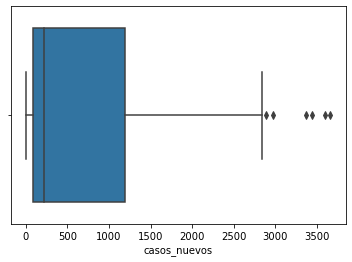

In [50]:
sns.boxplot(data1['casos_nuevos'])

In [81]:
data1_outliers =  data1[ data1['casos_nuevos'] > data1['casos_nuevos'].mean() + 2.0*data1['casos_nuevos'].std() ]

data1_outliers

,fecha,dia_cuarentena,casos_nuevos,casos_total,%mujer,%varon,mujer_total,varon_total,franja_etaria,edad_prom,importados_total,importados_nuevos,local_total,local_nuevos,comunitario_total,...,en_investigacion_nuevos,muertes_total,muertes_nuevos,alta_total,alta_nuevos,alta_definitiva,descartados_total,descartados_nuevos,tests_realizados_total,tests_realizados_nuevos,test_por_millon_hab,UTI_internados,UTI_%Nacion,UTI_%AMBA,observaciones
113,2020-06-26,98.0,2886,55343,"49,4","50,6",27339.0,28004.0,20-59,36.0,1061,0,20095,893,23464,...,607,1184,34,19143.0,NaN,NaN,218640.0,NaN,329036.0,10315.0,7251,472.0,"48,9","53,7",NaN
120,2020-07-03,105.0,2845,72786,"49,4","50,6",35956.0,36830.0,20-59,36.0,1068,1,25848,879,33867,...,242,1437,52,25930.0,NaN,NaN,250545.0,NaN,390382.0,8951.0,8603,620.0,51,"56,3",NaN
124,2020-07-07,109.0,2979,83426,"49,4","50,6",41212.0,42214.0,20-59,36.0,1074,1,28792,801,39718,...,465,1643,61,36502.0,NaN,NaN,267741.0,NaN,423782.0,9805.0,"9339,2",NaN,NaN,NaN,Reporte vespertino 20-07-07 no fue publicado e...
125,2020-07-08,110.0,3604,87030,"49,4","50,6",42993.0,44037.0,20-59,36.0,1074,0,29747,955,41495,...,872,1694,51,38313.0,NaN,NaN,273168.0,NaN,434692.0,10910.0,"9579,6",671.0,"52,4","59,7",NaN
126,2020-07-09,111.0,3663,90693,"49,4","50,6",44802.0,45891.0,NaN,NaN,1076,2,30597,850,43374,...,932,1720,26,38984.0,NaN,NaN,278647.0,NaN,445733.0,11041.0,"9822,9",662.0,"52,4","58,3",NaN
127,2020-07-10,112.0,3367,94060,"49,4","50,6",46466.0,47594.0,NaN,NaN,1078,2,31739,1142,45328,...,269,1774,54,41408.0,NaN,NaN,283872.0,NaN,456042.0,10309.0,"10050,1",686.0,"51,7","58,3",NaN
128,2020-07-11,113.0,3449,97509,"49,4","50,6",48169.0,49340.0,NaN,NaN,1080,2,32616,877,46824,...,1074,1810,36,42694.0,NaN,NaN,289032.0,NaN,466308.0,10266.0,"10276,4",NaN,NaN,NaN,Reporte vespertino 20-07-11 no fue publicado e...


In [61]:
type(columnas)

pandas.core.indexes.base.Index

In [132]:
for c in data1.columns:
    print(c,type(data1[c][120]))

fecha <class 'pandas._libs.tslibs.timestamps.Timestamp'>
dia_cuarentena <class 'numpy.float64'>
casos_nuevos <class 'numpy.int64'>
casos_total <class 'numpy.int64'>
%mujer <class 'str'>
%varon <class 'str'>
mujer_total <class 'numpy.float64'>
varon_total <class 'numpy.float64'>
franja_etaria <class 'str'>
edad_prom <class 'numpy.float64'>
importados_total <class 'numpy.int64'>
importados_nuevos <class 'numpy.int64'>
local_total <class 'numpy.int64'>
local_nuevos <class 'numpy.int64'>
comunitario_total <class 'numpy.int64'>
comunitario_nuevos <class 'numpy.float64'>
en_investigacion_total <class 'numpy.int64'>
en_investigacion_nuevos <class 'numpy.int64'>
muertes_total <class 'numpy.int64'>
muertes_nuevos <class 'numpy.int64'>
alta_total <class 'numpy.float64'>
alta_nuevos <class 'numpy.float64'>
alta_definitiva <class 'numpy.float64'>
descartados_total <class 'numpy.float64'>
descartados_nuevos <class 'numpy.float64'>
tests_realizados_total <class 'numpy.float64'>
tests_realizados_nuev

588.0588235294117 +/-$ 89.84463714395763


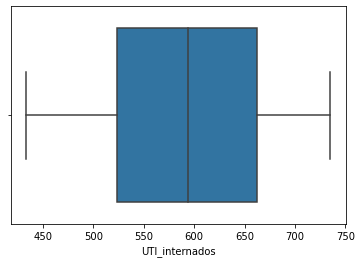

In [142]:
select = 'UTI_internados'

sns.boxplot(data1[select])
print(data1[select].mean(),'+/-$',data1[select].std())

4652.635416666667 +/-$ 2771.227963119339


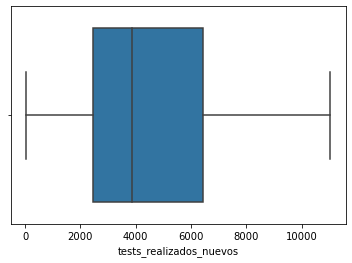

In [143]:
select = 'tests_realizados_nuevos'

sns.boxplot(data1[select])
print(data1[select].mean(),'+/-$',data1[select].std())

2218.45 +/-$ 942.0769392643422


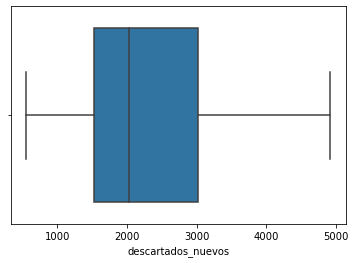

In [144]:
select = 'descartados_nuevos'

sns.boxplot(data1[select])
print(data1[select].mean(),'+/-$',data1[select].std())

134.69230769230768 +/-$ 222.7693508122245


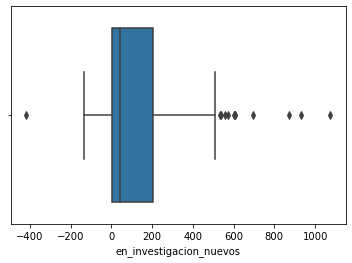

In [145]:
select = 'en_investigacion_nuevos'

sns.boxplot(data1[select])
print(data1[select].mean(),'+/-$',data1[select].std())

In [149]:
data1_outliers_up =  data1[ data1['en_investigacion_nuevos'] > data1['en_investigacion_nuevos'].mean() + 2.0*data1['en_investigacion_nuevos'].std()]

data1_outliers_dw =  data1[ data1['en_investigacion_nuevos'] < data1['en_investigacion_nuevos'].mean() - 2.0*data1['en_investigacion_nuevos'].std() ]

In [155]:
data1_outliers = pd.concat([data1_outliers_dw, data1_outliers_up])
data1_outliers

,fecha,dia_cuarentena,casos_nuevos,casos_total,%mujer,%varon,mujer_total,varon_total,franja_etaria,edad_prom,importados_total,importados_nuevos,local_total,local_nuevos,comunitario_total,...,en_investigacion_nuevos,muertes_total,muertes_nuevos,alta_total,alta_nuevos,alta_definitiva,descartados_total,descartados_nuevos,tests_realizados_total,tests_realizados_nuevos,test_por_millon_hab,UTI_internados,UTI_%Nacion,UTI_%AMBA,observaciones
117,2020-06-30,102.0,2262,64530,"49,4","50,6",31878.0,32652.0,20-59,36.0,1065,1,23565,1084,28732,...,-419,1307,27,23040.0,NaN,NaN,236563.0,NaN,362908.0,10506.0,7997,555.0,"50,5","55,5",NaN
111,2020-06-24,96.0,2635,49851,"49,4","50,6",24626.0,25225.0,20-59,36.0,1060,8,18460,805,20816,...,609,1116,38,14788.0,NaN,NaN,208232.0,NaN,309601.0,9258.0,6822,433.0,45,52,A partir de este día se empiezan a reportar da...
112,2020-06-25,97.0,2606,52457,"49,4","50,6",25914.0,26543.0,20-59,36.0,1061,1,19202,742,22078,...,601,1150,34,18416.0,NaN,NaN,213175.0,NaN,318721.0,9120.0,7023,457.0,"48,3","54,1",NaN
113,2020-06-26,98.0,2886,55343,"49,4","50,6",27339.0,28004.0,20-59,36.0,1061,0,20095,893,23464,...,607,1184,34,19143.0,NaN,NaN,218640.0,NaN,329036.0,10315.0,7251,472.0,"48,9","53,7",NaN
122,2020-07-05,107.0,2439,77815,"49,5","50,5",38518.0,39297.0,20-59,36.0,1072,3,27239,691,36235,...,696,1507,26,28531.0,NaN,NaN,258801.0,NaN,406210.0,6756.0,"8951,9",658.0,"51,4","57,7",NaN
125,2020-07-08,110.0,3604,87030,"49,4","50,6",42993.0,44037.0,20-59,36.0,1074,0,29747,955,41495,...,872,1694,51,38313.0,NaN,NaN,273168.0,NaN,434692.0,10910.0,"9579,6",671.0,"52,4","59,7",NaN
126,2020-07-09,111.0,3663,90693,"49,4","50,6",44802.0,45891.0,NaN,NaN,1076,2,30597,850,43374,...,932,1720,26,38984.0,NaN,NaN,278647.0,NaN,445733.0,11041.0,"9822,9",662.0,"52,4","58,3",NaN
128,2020-07-11,113.0,3449,97509,"49,4","50,6",48169.0,49340.0,NaN,NaN,1080,2,32616,877,46824,...,1074,1810,36,42694.0,NaN,NaN,289032.0,NaN,466308.0,10266.0,"10276,4",NaN,NaN,NaN,Reporte vespertino 20-07-11 no fue publicado e...
